In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from set_axes import set_ax
from models import *

### SIR Model testing ###

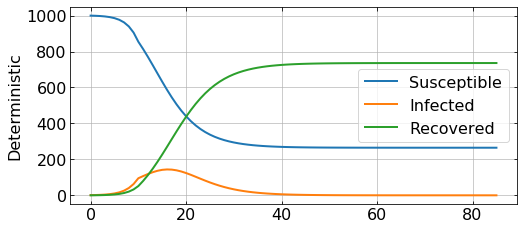

In [7]:
params = {'beta' : 0.9, 'gamma' : 0.3, 'S0' : 1000, 'I0' : 1, 'R0' : 0}
model = DeterministicSRI(**params)
params_new = {'beta' : 0.5, 'gamma' : 0.3}
model.evolve(days=10).update_parameters(**params_new).evolve(days=75)
xlabel = 'Days'
ylabel = 'Deterministic'
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax.plot(model.time, model.S, linewidth=2, label='Susceptible')
ax.plot(model.time, model.I, linewidth=2, label='Infected')
ax.plot(model.time, model.R, linewidth=2, label='Recovered')
#ax.plot(model.time, confirmed, linewidth=2, label='Confirmed')

set_ax(ax, ylabel=ylabel, legend=True)
plt.show()

In [9]:
# example use
params = {'beta' : 0.5, 'gamma' : 0.3, 'S0' : 999, 'I0' : 1, 'R0' : 0}
model1 = DeterministicSRI(**params)
model1.evolve(days=100)
model2 = StochasticSRI(**params)
model2.evolve(days=100)

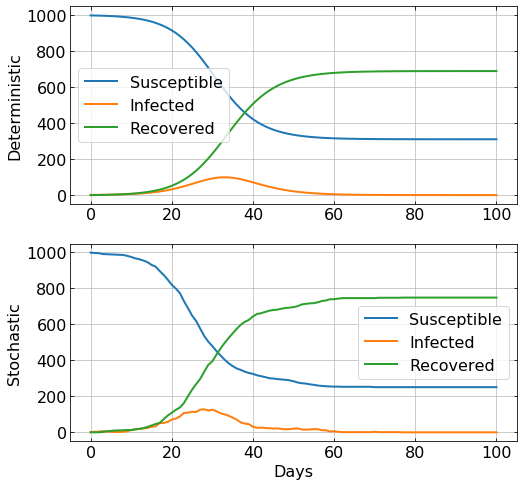

In [10]:
xlabel = 'Days'
ylabel1 = 'Deterministic'
ylabel2 = 'Stochastic'
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(model1.time, model1.S, linewidth=2, label='Susceptible')
ax1.plot(model1.time, model1.I, linewidth=2, label='Infected')
ax1.plot(model1.time, model1.R, linewidth=2, label='Recovered')
ax2.plot(model2.time, model2.S, linewidth=2, label='Susceptible')
ax2.plot(model2.time, model2.I, linewidth=2, label='Infected')
ax2.plot(model2.time, model2.R, linewidth=2, label='Recovered')
set_ax(ax1, ylabel=ylabel1, legend=True)
set_ax(ax2, xlabel=xlabel, ylabel=ylabel2, legend=True)
plt.show()

### SEIR Model testing ###

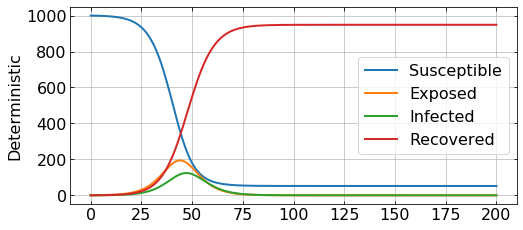

In [2]:
params = {'beta' : 0.9, 'alpha' : 0.2, 'gamma' : 0.3, 'initial_population' : (1000, 1, 0, 0)}
model = DeterministicSEIR(**params)
model.evolve(days=200)

xlabel = 'Days'
ylabel = 'Deterministic'
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax.plot(model.time, model.S, linewidth=2, label='Susceptible')
ax.plot(model.time, model.E, linewidth=2, label='Exposed')
ax.plot(model.time, model.I, linewidth=2, label='Infected')
ax.plot(model.time, model.R, linewidth=2, label='Recovered')

set_ax(ax, ylabel=ylabel, legend=True)
plt.show()

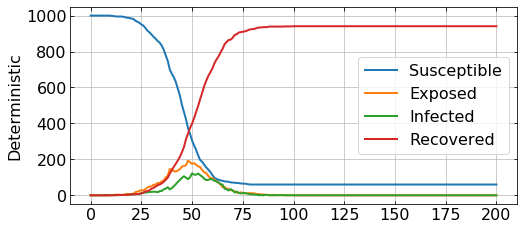

In [6]:
params = {'beta' : 0.9, 'alpha' : 0.2, 'gamma' : 0.3, 'initial_population' : (1000, 1, 0, 0)}
model = StochasticSEIR(**params)
model.evolve(days=200)

xlabel = 'Days'
ylabel = 'Deterministic'
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax.plot(model.time, model.S, linewidth=2, label='Susceptible')
ax.plot(model.time, model.E, linewidth=2, label='Exposed')
ax.plot(model.time, model.I, linewidth=2, label='Infected')
ax.plot(model.time, model.R, linewidth=2, label='Recovered')

set_ax(ax, ylabel=ylabel, legend=True)
plt.show()

# SEInrIrRD Model #

In this model, we try to increase the complexity of the system in order to make it a bit more realistic.
We assume that there are 6 kinds of individuals: 
1. S, susceptible - those individuals who have not contracted the virus but who could if in contact with infected individuals.
2. E, exposed - those individuals who have been in contact with infected individuals. Those individuals do not contribute to infect new susceptible individuals, since they are not currently contagious. However, they can potentially become infected at a later stage. It is possible for exposed indivuals not to contract the virus and become again susceptible. 
3. Inr, infected_non_recoverable - individuals who have contracted the virus and are at a too early stage to recover. They contribute to infect new individuals and a fraction of them could die.
4. Ir, infected_recoverable - individuals who have contracted the virus and went beyond the critical part. They can now become recovered individuals (with immunity) or susceptible again (in case they do not develop immunity. While being infected_recoverable, they still contribute to infect other individuals.
5. R, recovered - individuals who have succesfully recovered from the virus. Since they developed immunity, they cannot contract again the virus. The model allows for an average time after which they lose immunity, become thus once again susceptible individuals.
6. D, dead - individuals who did not manage to move to the infected_recoverable stage and died. Those individuals do not interact any longer with the rest of the population. 

The equations of motion for the six-typed population of the model are the following:

$$
\dot{S} = -\beta\ \frac{S(I_{nr} + I_r)}{N} + \lambda_E E + \lambda_I I_r + \lambda_R R\\
\dot{E} = \beta\ \frac{S(I_{nr} + I_r)}{N} - \alpha E - \lambda_E E\\
\dot{I}_{nr} = \alpha E - \delta I_{nr} - \xi I_{nr}\\
\dot{I}_r = \delta I_{nr} - \gamma I_r - \lambda_I I_r\\
\dot{R} = \gamma I_r - \lambda_R R\\
\dot{D} = \xi I_{nr}\\
N = S + E + I_{nr} + I_r + R + D
$$

Note that the combined equations imply a last equation: $\dot{N} = 0$, meaning that the population is considered isolated and no new individuas are considered as time passes. $\beta$ represents the rate of exposure, $\alpha$ represents the incubation time after which exposed individuals become infected and contageous, $\delta$ represents the average time after which infected individuals are out of danger and can hope to recover, $\xi$ represents the death rate while individuals are in the critical stage of the infection, $\gamma$ represents the recovery rate when the individual is in the infected_recoverable stage and the parameters $\lambda_E, \lambda_I, \lambda_R$ represent the chances of individuals to become suscceptible again when being respectively exposed (meaning those who do not develop the virus after an exposure), infected_recoverable (meaning those who do not develop immunity) and recovered (meaning those who lose immunity after a certain time).

Note that by setting $\lambda_E = \lambda_I = \lambda_R = \xi = 0$ we recover the classic model SEIR with two kind of infected individuals. In order to connect to have only one kind of infected individuals, who could both infect new ones or recover, we need to set $\delta$ much bigger that all other parameters, such that all new infected_non_recoverable individuals become immediately recoverable.

## Example of its use ##

### Deterministic ###

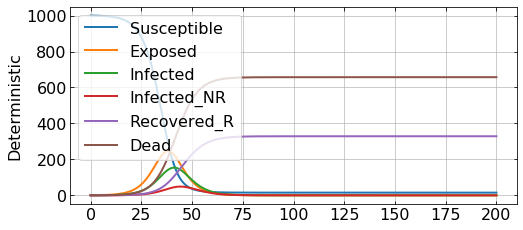

In [3]:
params = {'beta' : 0.9, 
          'alpha' : 0.2, 
          'gamma' : 0.3, 
          'xi' : 0.2,
          'delta' : 0.1,
          'lambda_E' : 0.0,
          'lambda_I' : 0.0,
          'lambda_R' : 0.0,
          'initial_population' : (1000, 1, 0, 0, 0, 0)}
model = DeterministicSEInrIrRD(**params)
model.evolve(days=200)

xlabel = 'Days'
ylabel = 'Deterministic'
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax.plot(model.time, model.S, linewidth=2, label='Susceptible')
ax.plot(model.time, model.E, linewidth=2, label='Exposed')
ax.plot(model.time, model.Inr, linewidth=2, label='Infected')
ax.plot(model.time, model.Ir, linewidth=2, label='Infected_NR')
ax.plot(model.time, model.R, linewidth=2, label='Recovered_R')
ax.plot(model.time, model.D, linewidth=2, label='Dead')

set_ax(ax, ylabel=ylabel, legend=True)
plt.show()

### Stochastic ###

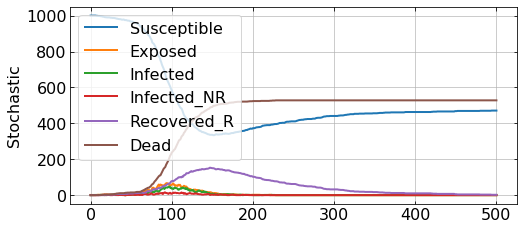

In [14]:
params = {'beta' : 0.4, 
          'alpha' : 0.2, 
          'gamma' : 0.3, 
          'xi' : 0.2,
          'delta' : 0.1,
          'lambda_E' : 0.0,
          'lambda_I' : 0.0,
          'lambda_R' : 0.01,
          'initial_population' : (1000, 1, 0, 0, 0, 0)}
model = StochasticSEInrIrRD(**params)
model.evolve(days=500)

xlabel = 'Days'
ylabel = 'Stochastic'
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax.plot(model.time, model.S, linewidth=2, label='Susceptible')
ax.plot(model.time, model.E, linewidth=2, label='Exposed')
ax.plot(model.time, model.Inr, linewidth=2, label='Infected')
ax.plot(model.time, model.Ir, linewidth=2, label='Infected_NR')
ax.plot(model.time, model.R, linewidth=2, label='Recovered_R')
ax.plot(model.time, model.D, linewidth=2, label='Dead')

set_ax(ax, ylabel=ylabel, legend=True)
plt.show()

### Stochastic with change of parameters after some days ###

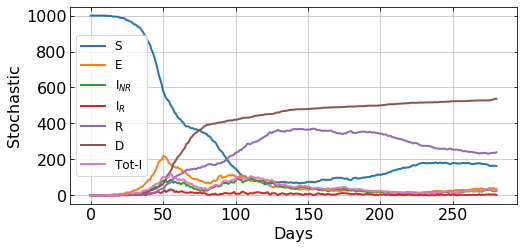

In [88]:
params = {'beta' : 0.6, 
          'alpha' : 0.1, 
          'gamma' : 0.3, 
          'xi' : 0.1,
          'delta' : 0.1,
          'lambda_E' : 0,
          'lambda_I' : 0.01,
          'lambda_R' : 0.01,
          'initial_population' : (1000, 1, 0, 0, 0, 0)}
model = StochasticSEInrIrRD(**params)
model.evolve(days=50)

# we assume that some measures have been taken, so beta becomes lower
# we also assume that the health system has been saturated, so xi becomes higher
params_new = {'beta' : 0.25, 
              'alpha' : 0.1, 
              'gamma' : 0.3, 
              'xi' : 0.2,
              'delta' : 0.1,
              'lambda_E' : 0,
              'lambda_I' : 0.01,
              'lambda_R' : 0.01}
model.update_parameters(**params_new)
model.evolve(days=30)
# note that the total number of infected individuals still grows after measures are taken!
# That is because of all the exposed individuals who become infected afterwards


# after one month of measures, people are a bit too excited when measures are removed.
# The interaction between them becomes thus higher then before even though there are still
# few individuals around who have the virus.
# We assume that some cures have been found (mortality very low now) and that the health system
# is more prepared (recovery rate higher)
params_new = {'beta' : 0.8, 
              'alpha' : 0.1, 
              'gamma' : 0.6, 
              'xi' : 0.02,
              'delta' : 0.1,
              'lambda_E' : 0,
              'lambda_I' : 0.01,
              'lambda_R' : 0.01}
model.update_parameters(**params_new)
model.evolve(days=200)
              
xlabel = 'Days'
ylabel = 'Stochastic'
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax.plot(model.time, model.S, linewidth=2, label='S')
ax.plot(model.time, model.E, linewidth=2, label='E')
ax.plot(model.time, model.Inr, linewidth=2, label=r'I$_{NR}$')
ax.plot(model.time, model.Ir, linewidth=2, label=r'I$_{R}$')
ax.plot(model.time, model.R, linewidth=2, label='R')
ax.plot(model.time, model.D, linewidth=2, label='D')
ax.plot(model.time, model.I, linewidth=2, label='Tot-I')
#ax.set_yscale('log')
set_ax(ax, xlabel=xlabel, ylabel=ylabel, legend=True, fs_legend=12)
plt.show()

# CompartmentManager with SIR #

In [4]:
link = np.array([[1e-4, 0, 0, 1e-4]]*4)
params = {'beta' : 0.4, 'gamma' : 0.4, 'S0' : 99999, 'I0' : 100, 'R0' : 0}
params2 = {'beta' : 0.8, 'gamma' : 0.5, 'S0' : 1000, 'I0' : 0, 'R0' : 0}
params3 = {'beta' : 0.6, 'gamma' : 0.5, 'S0' : 1000, 'I0' : 0, 'R0' : 0}
params4 = {'beta' : 1, 'gamma' : 0.3, 'S0' : 10000000, 'I0' : 0, 'R0' : 0}
param_list=[params, params2, params3, params4]  # one cell with 10 infects and all others infection-free

simulator = CompartmentManager(parameters_list=param_list, link=link, model='SIR')
simulator.evolve(200)

Ss = simulator.S
Is = simulator.I
Rs = simulator.R

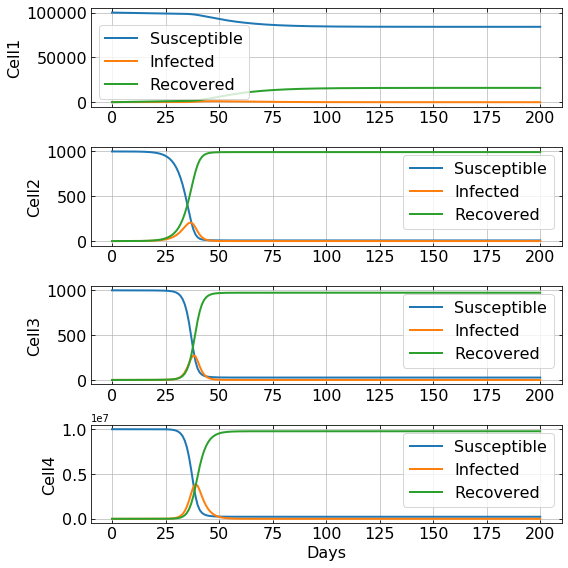

In [3]:
xlabel = 'Days'
ylabel1 = 'Cell1'
ylabel2 = 'Cell2'
ylabel3 = 'Cell3'
ylabel4 = 'Cell4'
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax1.plot(simulator.time, Ss[0], linewidth=2, label='Susceptible')
ax1.plot(simulator.time, Is[0], linewidth=2, label='Infected')
ax1.plot(simulator.time, Rs[0], linewidth=2, label='Recovered')
ax2.plot(simulator.time, Ss[1], linewidth=2, label='Susceptible')
ax2.plot(simulator.time, Is[1], linewidth=2, label='Infected')
ax2.plot(simulator.time, Rs[1], linewidth=2, label='Recovered')
ax3.plot(simulator.time, Ss[2], linewidth=2, label='Susceptible')
ax3.plot(simulator.time, Is[2], linewidth=2, label='Infected')
ax3.plot(simulator.time, Rs[2], linewidth=2, label='Recovered')
ax4.plot(simulator.time, Ss[3], linewidth=2, label='Susceptible')
ax4.plot(simulator.time, Is[3], linewidth=2, label='Infected')
ax4.plot(simulator.time, Rs[3], linewidth=2, label='Recovered')
set_ax(ax1, ylabel=ylabel1, legend=True)
set_ax(ax2, ylabel=ylabel2, legend=True)
set_ax(ax3, ylabel=ylabel3, legend=True)
set_ax(ax4, xlabel=xlabel, ylabel=ylabel4, legend=True)
plt.tight_layout()
fig.savefig('four_cell_interaction.pdf')
plt.show()